# Phase Field Crystal (PFC) Model of Provatas & Elder Figure 8.6

> Two dimensional ordering in the Swift-Hohenberg equation with extra cubic term in free energy functional (see Eq. (8.44)). In this figure the color corresponds to the magnitude of ψ. These simulations were conducted for ($\epsilon$, $q_0$, $\Gamma$, $D$, $\alpha$) = (0.1, 1, 1, 0, 1/2), in a system of size (128 × 128) and Figs a), b) c), d) correspond to times t = 100, 200, 400 and 800 respectively.

In [5]:
epsilon = 0.1
q0 = 1
Gamma = 1
D = 0
alpha = 1/2

> $$\mathcal{F} = \int d\vec{r}\left[
    \frac{1}{2}\psi\left(
        -\epsilon
        + \left(
            q_0^2 + \nabla^2
        \right)^2
    \right)\psi
    + \alpha \frac{\psi^3}{3}
    + \frac{\psi^4}{4}
\right] \tag{8.44}$$

> $$\frac{\partial\psi}{\partial t} 
= -\Gamma\frac{\delta\mathcal{F}}{\delta\psi} + \eta
\tag{8.10}
$$
where $\Gamma$ is a phenomenological parameter that can be scaled out, $\eta$ is a Gaussian random noise term with correlations $\langle\eta\rangle = 0$ and 
$\langle\eta(\vec{r},t)\eta(\vec{r}',t')\rangle = 2\Gamma D \delta(\vec{r} - \vec{r}')\delta(t-t')$ and $D$ is the noise strength.

$$\frac{\delta\mathcal{F}}{\delta\psi} =
\left(
    -\epsilon
    + \left(
        q_0^2 + \nabla^2
    \right)^2
\right)\psi
+ \alpha \psi^2
+ \psi^3
$$

In [2]:
import fipy as fp

In [3]:
mesh = fp.Grid2D(nx=128, ny=128)

In [7]:
psi = fp.CellVariable(mesh=mesh, name=r"$\psi$", hasOld=True)

$$\begin{aligned}
\frac{\partial\psi}{\partial t} 
&= -\Gamma\left[
    \left(
        -\epsilon
        + \left(
            q_0^2 + \nabla^2
        \right)^2
    \right)\psi
    + \alpha \psi^2
    + \psi^3
\right] + \eta
\\
&= -\Gamma\left[
    \left(
        -\epsilon\psi
        + \left(
            q_0^2 + \nabla^2
        \right)
        \left(
            q_0^2 + \nabla^2
        \right)\psi
    \right)
    + \alpha \psi^2
    + \psi^3
\right] + \eta
\\
&= -\Gamma\left[
    \left(
        -\epsilon\psi
        + \left(
            q_0^2 + \nabla^2
        \right)
        \xi
    \right)
    + \alpha \psi^2
    + \psi^3
\right] + \eta
\\
&= \Gamma\left(
        \epsilon
        - \alpha\psi
        - \psi^2
    \right)\psi
    - \Gamma q_0^2 \xi
    - \Gamma\nabla^2\xi
    + \eta
\end{aligned}
$$

In [8]:
xi = fp.CellVariable(mesh=mesh, name=r"$\xi$")

In [9]:
psi_eq = (fp.TransientTerm(var=psi)
          == fp.ImplicitSourceTerm(coeff=Gamma*(epsilon - alpha*psi - psi**2), var=psi)
          - fp.ImplicitSourceTerm(coeff=Gamma*q0**2, var=xi)
          - fp.DiffusionTerm(coeff=Gamma, var=xi))

where
$$\xi = q_0^2 \psi + \nabla^2\psi$$

In [10]:
xi_eq = (fp.ImplicitSourceTerm(coeff=1, var=xi)
         == fp.ImplicitSourceTerm(coeff=q0**2, var=psi)
         + fp.DiffusionTerm(coeff=1, var=psi))

In [11]:
eq = psi_eq & xi_eq

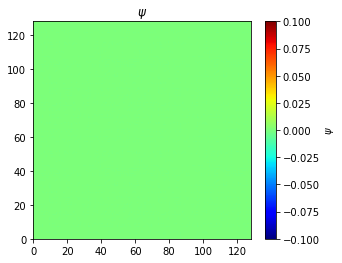

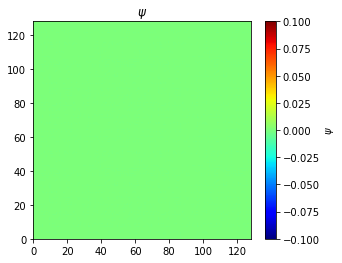

In [12]:
viewer = fp.Viewer(vars=psi)
viewer.plot()

In [16]:
psi.setValue(fp.GaussianNoiseVariable(mesh=mesh))

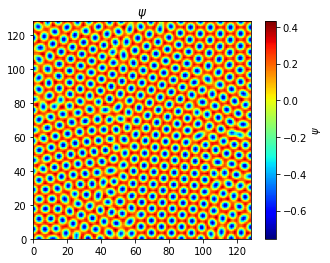

<Figure size 432x288 with 0 Axes>

In [17]:
for step in range(800):
    psi.updateOld()
    eq.solve(dt=1)
    viewer.plot()